In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import psutil
import geopandas as gpd
from shapely.geometry import Point
import folium

In [2]:
sf2009 = pd.read_csv('/Users/davidhaines/DataScience/data-question-4-affordable-housing-plaid-platypi-plaidypi/metrodata/2009singlefamily_final_with_sqft.txt')
sf2013 = pd.read_csv('/Users/davidhaines/DataScience/data-question-4-affordable-housing-plaid-platypi-plaidypi/metrodata/2013singlefamily_final_with_sqft.txt')
sf2017 = pd.read_csv('/Users/davidhaines/DataScience/data-question-4-affordable-housing-plaid-platypi-plaidypi/metrodata/2017singlefamily_final_with_sqft.txt')

In [31]:
sf2009.head()

,APN,DistrictCode,DistrictNo,Address,City,Zip,LandValue,ImprovementValue,AppraisedValue,2009 TOTAL ASSD,FinishedArea,PricePerSqFt,Yearly_Housing_Spending
0,00200000300,RT,10,1012 OLD BUCK HILL RD,GOODLETTSVILLE,37072,49800.0,65700.0,115500.0,28875.0,1920.0,60.156250,5232.568086
1,00200000700,RT,10,1109 HIGHLAND AVE,GOODLETTSVILLE,37072,44100.0,88700.0,132800.0,33200.0,1464.0,90.710383,6016.320708
2,00200001001002,GSD,10,0 SPRINGFIELD HWY,GOODLETTSVILLE,37072,15000.0,137900.0,152900.0,38225.0,3539.0,43.204295,6926.923466
3,00200001400001,RT,10,133 B EAST END RD,GOODLETTSVILLE,37072,41100.0,27000.0,68100.0,17025.0,736.0,92.527174,3085.176508
4,00200001600001,RT,10,141 B EAST END RD,GOODLETTSVILLE,37072,25100.0,60900.0,86000.0,21500.0,1301.0,66.102998,3896.111302


In [4]:
sf2009.rename(columns={'APN':'APN', 'DistrictCode':'DistrictCode', 'Council District':'DistrictNo', 'AddressFullAddress': 'Address', 'AddressCity':'City', 'AddressPostalCode':'Zip', '2009 LAND':'LandValue', '2009 IMPR':'ImprovementValue', '2009 TOTAL APPR':'AppraisedValue', '2009 TOTAL ASSD':'2009 TOTAL ASSD'}, inplace=True)

In [5]:
sf2013.rename(columns={'APN':'APN', 'DistrictCode':'DistrictCode', 'Council District':'DistrictNo', 'AddressFullAddress': 'Address', 'AddressCity':'City', 'AddressPostalCode':'Zip', '2013 LAND':'LandValue', '2013 IMPR':'ImprovementValue', '2013 TOTAL APPR':'AppraisedValue', '2013 TOTAL ASSD':'2013 TOTAL ASSD'}, inplace=True)

In [6]:
sf2017.rename(columns={'APN':'APN', 'DistrictCode':'DistrictCode', 'Council District':'DistrictNo', 'AddressFullAddress': 'Address', 'AddressCity':'City', 'AddressPostalCode':'Zip', '2017 LAND':'LandValue', '2017 IMPR':'ImprovementValue', '2017 TOTAL APPR':'AppraisedValue', '2017 TOTAL ASSD':'2017 TOTAL ASSD'}, inplace=True)

In [ ]:
sf2009.info()

In [ ]:
sf2009.head()

In [13]:
nulls09 = sf2009.loc[sf2009['FinishedArea'] == 0].index
nulls13 = sf2013.loc[sf2013['FinishedArea'] == 0].index
nulls17 = sf2017.loc[sf2017['FinishedArea'] == 0].index

In [14]:
sf2009 = sf2009.drop(index=nulls09)
sf2013 = sf2013.drop(index=nulls13)
sf2017 = sf2017.drop(index=nulls17)

In [9]:
sf2009.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183101 entries, 0 to 183405
Data columns (total 11 columns):
APN                 183101 non-null object
DistrictCode        183101 non-null object
DistrictNo          183101 non-null int64
Address             183101 non-null object
City                183101 non-null object
Zip                 183101 non-null int64
LandValue           183101 non-null float64
ImprovementValue    183101 non-null float64
AppraisedValue      183101 non-null float64
2009 TOTAL ASSD     183101 non-null float64
FinishedArea        183101 non-null float64
dtypes: float64(5), int64(2), object(4)
memory usage: 16.8+ MB


In [15]:
sf2009['PricePerSqFt'] = sf2009.AppraisedValue/sf2009.FinishedArea
sf2013['PricePerSqFt'] = sf2013.AppraisedValue/sf2013.FinishedArea
sf2017['PricePerSqFt'] = sf2017.AppraisedValue/sf2017.FinishedArea

In [18]:
sf2009.loc[sf2009.Yearly_Housing_Spending == sf2009.Yearly_Housing_Spending.max()]

,APN,DistrictCode,DistrictNo,Address,City,Zip,LandValue,ImprovementValue,AppraisedValue,2009 TOTAL ASSD,FinishedArea,PricePerSqFt,Yearly_Housing_Spending
138424,14407000500,FH,34,1152 CRATER HILL DR,NASHVILLE,37215,3120000.0,7257000.0,10377000.0,2594250.0,20394.0,508.826125,470115.662578


In [11]:
r=0.0475/12 # monthly interest rate
m=30*12 # number of months in 30 years

# calculate yearly spending

sf2009['Yearly_Housing_Spending']=12*(sf2009.AppraisedValue-sf2009.AppraisedValue*0.05)*((r*(1+r)**m)/((1+r)**(m-1)))
sf2013['Yearly_Housing_Spending']=12*(sf2013.AppraisedValue-sf2013.AppraisedValue*0.05)*((r*(1+r)**m)/((1+r)**(m-1)))
sf2017['Yearly_Housing_Spending']=12*(sf2017.AppraisedValue-sf2017.AppraisedValue*0.05)*((r*(1+r)**m)/((1+r)**(m-1)))

In [24]:
print('30th percentile annual housing cost, 2009: ' + str(sf2009['Yearly_Housing_Spending'].quantile(0.3)))
print('30th percentile annual housing cost, 2013: ' + str(sf2013['Yearly_Housing_Spending'].quantile(0.3)))
print('30th percentile annual housing cost, 2017: ' + str(sf2017['Yearly_Housing_Spending'].quantile(0.3)))

30th percentile annual housing cost, 2009: 5191.794828125001
30th percentile annual housing cost, 2013: 5024.171434895834
30th percentile annual housing cost, 2017: 7280.291700520835


In [57]:
sf2009.loc[sf2009.Yearly_Housing_Spending == sf2009.Yearly_Housing_Spending.max()]

,APN,DistrictCode,DistrictNo,Address,City,Zip,LandValue,ImprovementValue,AppraisedValue,2009 TOTAL ASSD,FinishedArea,PricePerSqFt,Yearly_Housing_Spending
138424,14407000500,FH,34,1152 CRATER HILL DR,NASHVILLE,37215,3120000.0,7257000.0,10377000.0,2594250.0,20394.0,508.826125,470115.662578


In [12]:
sf2009.FinishedArea.describe()

count    183101.000000
mean       1784.938334
std         987.279617
min         175.000000
25%        1167.000000
50%        1542.000000
75%        2106.000000
max       40418.000000
Name: FinishedArea, dtype: float64

In [59]:
sf2009.loc[sf2009.PricePerSqFt == sf2009.PricePerSqFt.max()]

,APN,DistrictCode,DistrictNo,Address,City,Zip,LandValue,ImprovementValue,AppraisedValue,2009 TOTAL ASSD,FinishedArea,PricePerSqFt,Yearly_Housing_Spending
157816,15700000600,FH,34,0 CHICKERING RD,NASHVILLE,37215,2299200.0,5300.0,2304500.0,576125.0,532.0,4331.766917,104402.19181


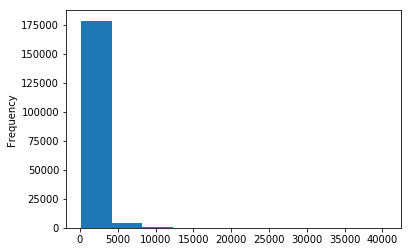

In [56]:
sf2009.FinishedArea.plot(kind='hist')

In [52]:
sf2009['Yearly_Housing_Spending'].describe()

count    183101.000000
mean       9132.349789
std       10094.401284
min         185.744841
25%        4883.730214
50%        6582.615956
75%        9966.796354
max      470115.662578
Name: Yearly_Housing_Spending, dtype: float64

In [11]:
sf2013['Yearly_Housing_Spending'].describe()

count    186269.000000
mean       9108.083731
std       10329.934434
min          63.425068
25%        4684.394286
50%        6469.356906
75%       10021.160698
max      526903.749987
Name: Yearly_Housing_Spending, dtype: float64

In [13]:
sf2017['Yearly_Housing_Spending'].describe()

count    197114.000000
mean      12599.598931
std       12431.198272
min         113.259049
25%        6781.951883
50%        9414.092193
75%       14198.154443
max      520801.352401
Name: Yearly_Housing_Spending, dtype: float64

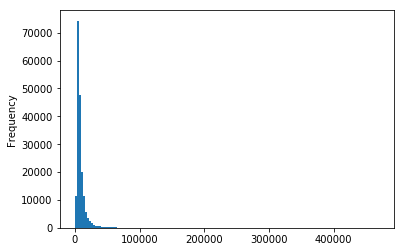

In [16]:
sf2009.Yearly_Housing_Spending.plot(kind='hist', bins=150)

In [ ]:
sf2013.info()

In [ ]:
sf2017.info()

In [ ]:
sf2009.AppraisedValue.describe()

In [ ]:
sf2009.AppraisedValue.plot()

In [ ]:
sf2013.AppraisedValue.describe()

In [ ]:
sf2013.AppraisedValue.plot()

In [ ]:
sf2017.AppraisedValue.describe()

In [ ]:
sf2017.AppraisedValue.plot()

In [ ]:
sf2009.AppraisedValue.describe()

In [20]:
issued = pd.read_csv('/Users/davidhaines/DataScience/data-question-4-affordable-housing-plaid-platypi-plaidypi/metrodata/Building_Permits_Issued.csv', low_memory=False)

In [ ]:
issued.head()

In [21]:
issued.rename(columns={'Permit #': 'PermitNo', 'Permit Type Description':'PermTypeDesc', 'Permit Subtype Description': 'PermSubDesc', 'Parcel':'Parcel', 'Date Entered':'EnteredDt', 'Date Issued': 'IssuedDt', 'Const. Cost': 'ConstCost', 'Address':'Address', 'City':'City', 'State':'State', 'Zip':'Zip', 'Subdivision/Lot': 'Subdiv_Lot', 'Contact':'Contact', 'Permit Type': 'PermType', 'Permit Subtype': 'PermSubtype', 'IVR Trk#': 'IVRTrk#', 'Purpose':'Purpose', 'Council Dist':'CouncilDist', 'Census Tract':'CensusTract', 'Mapped Location':'MappedLoc'}, inplace=True)

In [22]:
issued['EnteredDt'] = pd.to_datetime(issued['EnteredDt'])
issued['IssuedDt'] = pd.to_datetime(issued['IssuedDt'])

In [ ]:
issued.info()

In [ ]:
issued.MappedLoc.unique()

In [ ]:
issued.columns

In [ ]:
issued.PermTypeDesc.unique()

In [ ]:
issued.head()

In [ ]:
permitdecode = pd.DataFrame(issued[['PermTypeDesc','PermType']])

In [ ]:
result = re.findall('-?\d*\.\d*', issued.MappedLoc[1])

In [ ]:
print(result)

In [ ]:
permitdecode.drop_duplicates()

CARN, CARR, CADM

In [ ]:
#resnew = pd.DataFrame(issued.loc[issued['PermType'] == 'CARW'])
respermits = pd.DataFrame(issued.loc[issued['PermType'].isin(['CARN','CARR'])])

In [ ]:
respermits.info()

In [ ]:
newhomes = respermits.Purpose.str.match(r'[dD]emolition')

In [ ]:
respermits.

In [ ]:
respermits.Purpose.unique()

In [ ]:
demos = pd.DataFrame(issued.loc[issued['PermType'] == 'CADM'])

In [ ]:
demos.ConstCost.median()

In [ ]:
respermits.set_index('IssuedDt', inplace=True)

In [ ]:
respermits.info()

In [ ]:
len(respermits.PermSubDesc.unique())

In [ ]:
monthlycost = respermits['ConstCost'].resample('M').mean()

In [ ]:
monthlycost.plot()

In [ ]:
respermits.

In [ ]:
respermits.describe()

In [ ]:
resnew.EnteredDt.describe()

In [ ]:
resnew.IssuedDt.describe()

In [ ]:
resnew.ConstCost.describe()

In [ ]:
issued['CouncilDist'].unique()

In [ ]:
issued['MappedLoc'][1]

In [ ]:
issued['extcoords'] = issued.MappedLoc.str.extract(r'?\(.*\)', expand=False)

In [ ]:
coords = re.compile(r'\(.*\)')

In [ ]:
matches = []

In [ ]:
for string in issued.MappedLoc:
    match = re.findall(coords, string)
    matches.append(match)

In [ ]:
type(matches)

In [ ]:
type(matches[1])

In [ ]:
#[s for s in i[s] for i in matches]

coordlist = []
for i in enumerate(matches):
    i = []
    for s in i[s]:
        coordlist.append(tuple(s))

In [ ]:
len(matches)

In [ ]:
matches[1]

In [ ]:
issued['coords'] = pd.Series(matches).astype(tuple)

In [ ]:
issued['coords'][1]

Income data:
    Median average income: 68000
        Income subgroups:
        30% MAI (20400 /yr) (30% housing = 510/mo)
        60% MAI (40800 /yr) (30% housing = 1020/mo)
        80% MAI (54400 /yr) (30% housing = 1360/mo)
        120% MAI (81600 /yr) (30% housing = 2040/mo)

Model development:
    
    Owners = 54%
        - Model annual adjustments to these numbers
    
    
    Median Housing Cost - Owner = 1336/month * 12 = 16032/yr

    15-yr owner gap (affordable) = 3367
    15-yr owner gap (market) = 35751

    10-yr predicted owner gap (affordable) = 1257
    10-yr predicted owner gap (market) = 41421
    

In [ ]:
issued.Issued.min()

In [ ]:
issued.Issued.max()

In [ ]:
issued['monthlies'] = pd.Series([cost/360 for cost in issued.ConstCost])

In [ ]:
issued.info()

In [ ]:
issued.Zip.unique()

Question 1: At what point in time did the Codes Administration decide to begin “closing the loophole” by converting R zoning to RS?

Response 1: The Codes Administration does not set zoning policy, we interpret/enforce it. The Planning Commission and Metro Council are the ones who change zoning rules. The last major revision countywide to the zoning code was in 1997 when they rezoned a lot of properties in bulk. Since then, Councilmembers have proposed zoning changes for their neighborhoods on a piecemeal basis, or developers have requested zoning changes for particular properties. There hasn’t been an effort by Metro Government to downzone properties because of the duplex situation, but some Council members have. (edited)

Question 2: According to the report (Housing Nashville), there are predetermined amounts of needed housing and rental properties in each district. How is the split between housing demand and rental demand being evaluated? Is this arbitrary or is there census data giving us a proportion to go off of?

Question 3: What criteria was used to calculated the ‘Maximum Affordable Sales Price’  from the MHI on page 56 of the Housing Nashville Report? What interest rate and/or tax rate was assumed?

Response 2 & 3: Unfortunately, the folks that produced the Housing Nashville Report have left Metro Government so I don’t know that we’ll get all the answers. Looking at question three, I believe the estimate was based on a 5% down payment and about a 4% interest rate for a 30 year mortgage.
Also, We have also asked Assessments for an update to the 3-years of assessment data to include the square footage of the property and the zoning code for the property. (edited)

Renters = 46%
Median Housing Cost - Renter = 874/month * 12 = 10488/yr
    
    15-yr rental gap (affordable) = 17754
    15-yr rental gap (market) = 22219
        
    10-yr predicted rental gap (affordable) = 30934
    10-yr predicted rental gap (market) = 23043

In [25]:
codetypes = pd.read_excel('/Users/davidhaines/DataScience/data-question-4-affordable-housing-plaid-platypi-plaidypi/metrodata/Codes-Type-Subtype-List-20181011.xlsx')

In [26]:
codetypes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 4 columns):
CASE_TYPE         947 non-null object
CASE_TYPE_DESC    947 non-null object
SUB_TYPE          932 non-null object
SUB_TYPE_DESC     932 non-null object
dtypes: object(4)
memory usage: 29.7+ KB


In [27]:
codetypes.CASE_TYPE_DESC.unique()

array(['Codes Miscellaneous Inspection', 'Building And Fire Board Appeal',
       'Electrical Board Appeal', 'Electrical Alarm Permit',
       'Mechanical Board Appeal', 'Plumbing Board Appeal',
       'Property St / Violations Appeal', 'Zoning Board Appeal',
       'Building Blasting Permit', 'Building Commercial - Addition',
       'Building Commercial - Amend Permit',
       'Building Commercial - Foundation',
       'Building Commercial - Structural Frame',
       'Building Commercial - Shell', 'Building Commercial - Fire Damage',
       'Building Commercial - Roofing / Siding',
       'Building Commercial - Storm Damage', 'Building Commercial - New',
       'Building Commercial - Change Contractor',
       'Building Commercial - Rehab',
       'Building Commercial - Tenant Finish Out',
       'Building Commercial - Code Repair',
       'Building Commercial - Renew Permit', 'Building Demolition Permit',
       'Electrical Permit', 'Electrical Photovoltaic Permit',
       'Electrica

In [30]:
codetypes.loc[codetypes.CASE_TYPE_DESC == 'Building Residential - New']

,CASE_TYPE,CASE_TYPE_DESC,SUB_TYPE,SUB_TYPE_DESC
741,CARN,Building Residential - New,CAA01R301,Single Family Residence
742,CARN,Building Residential - New,CAA02R302,Duplex
743,CARN,Building Residential - New,CAA03R298,"Multifamily, Condominium 3&4 Unit Bldg"
744,CARN,Building Residential - New,CAA03R299,"Multifamily, Condominium > 5 Unit Bldg"
745,CARN,Building Residential - New,CAA03R301,"Multifamily, Townhome"
746,CARN,Building Residential - New,CAA03R398,"Multifamily, Tri-Plex, Quad, Apartments"
747,CARN,Building Residential - New,CAA03R399,"Multifamily, Apt / Twnhome > 5 Unit Bldg"
748,CARN,Building Residential - New,CAA04R301,Mobile Home Dwelling
749,CARN,Building Residential - New,CAA05R202,Boarding House (More Than 30 Day Stay)
750,CARN,Building Residential - New,CAA08R301,"Home Occupation, Single Family Residence"
